<a href="https://colab.research.google.com/github/theresiasns/capstone/blob/main/Corn_Disease_Good_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 37.6 MB/s eta 0:00:00


In [3]:
pip install keras-preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
import os

drive.mount("/content/drive/")

Mounted at /content/drive/


In [6]:
base_dir="/content/drive/MyDrive/corn/"
!ls"/content/drive/MyDrive/corn/"

/bin/bash: ls/content/drive/MyDrive/corn/: No such file or directory


In [7]:
directory =os.path.join(base_dir,"train/")

In [8]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']
4


In [9]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [10]:
dataset=[]
testset=[]
count=0
for name in Name:
    path=os.path.join(directory,name)
    t=0
    for im in os.listdir(path):
        if im[-4:]=='.jpg':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            if t<60:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1

In [11]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [12]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [13]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [14]:
print(len(labels))
print(len(tlabels))

175
884


In [15]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [16]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(140, 100, 100, 3)
(35, 100, 100, 3)
(140, 4)
(35, 4)


In [17]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest")

In [18]:
# Load the pre-trained model without the top (classification) layers
pretrained_model = tf.keras.applications.DenseNet201(weights='imagenet', input_shape=(100,100,3),include_top=False,pooling='avg')

# Freeze the pre-trained layers so they are not updated during training
for layer in pretrained_model.layers:
  layer.trainable = False

74836368/74836368 [==============================] - 4s 0us/step


In [19]:
from tensorflow.keras import layers
from keras.layers import Flatten
from keras.layers import BatchNormalization

inputs = pretrained_model.input
x = Flatten()(pretrained_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.4)(x)  # Dropout layer dengan dropout rate 0.2
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [20]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=50)

Epoch 1/50
5/5 [==============================] - 29s 2s/step - loss: 1.4755 - accuracy: 0.3286 - val_loss: 1.0456 - val_accuracy: 0.5714
Epoch 2/50
5/5 [==============================] - 1s 103ms/step - loss: 1.1169 - accuracy: 0.4929 - val_loss: 0.8593 - val_accuracy: 0.7714
Epoch 3/50
5/5 [==============================] - 1s 107ms/step - loss: 0.8711 - accuracy: 0.5857 - val_loss: 0.7716 - val_accuracy: 0.8000
Epoch 4/50
5/5 [==============================] - 1s 118ms/step - loss: 0.8065 - accuracy: 0.6286 - val_loss: 0.7259 - val_accuracy: 0.7143
Epoch 5/50
5/5 [==============================] - 1s 104ms/step - loss: 0.8322 - accuracy: 0.5929 - val_loss: 0.6989 - val_accuracy: 0.7714
Epoch 6/50
5/5 [==============================] - 1s 104ms/step - loss: 0.6779 - accuracy: 0.6929 - val_loss: 0.6821 - val_accuracy: 0.7429
Epoch 7/50
5/5 [==============================] - 1s 137ms/step - loss: 0.6329 - accuracy: 0.7429 - val_loss: 0.6180 - val_accuracy: 0.8000
Epoch 8/50
5/5 [======

In [22]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

2/2 [==============================] - 3s 51ms/step
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.75      0.86        12
           3       0.85      1.00      0.92        11

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.93      0.91      0.91        35



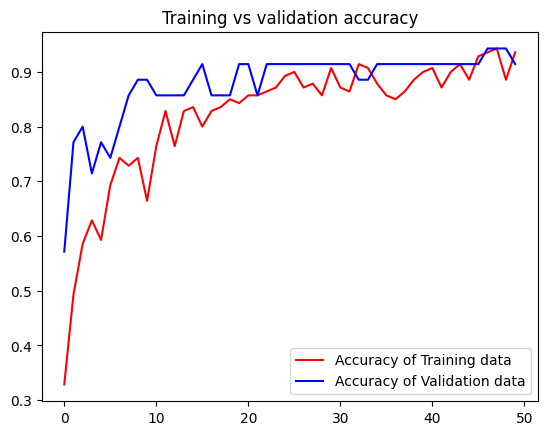

<Figure size 640x480 with 0 Axes>

In [23]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

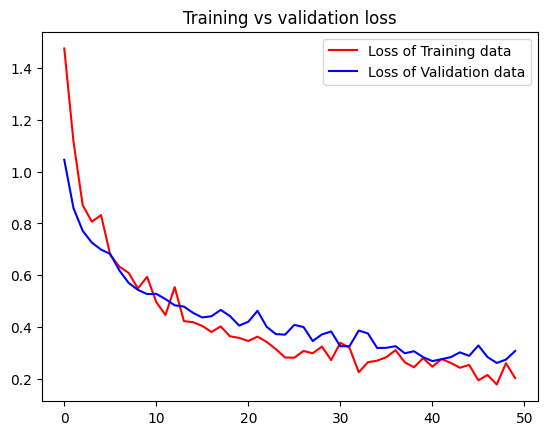

<Figure size 640x480 with 0 Axes>

In [24]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [31]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(100, 100))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)

  print(classes[0])
  value=np.argmax(classes)
  move_name=mapper(value)
  
  print("Prediction is {}.".format(move_name))
 

Saving spot corn.png to spot corn (1).png
1/1 [==============================] - 0s 35ms/step
[1.18586577e-04 1.14699236e-04 2.05083266e-02 9.79258478e-01]
Prediction is Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot.


In [26]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(884, 100, 100, 3)
28/28 [==============================] - 3s 120ms/step
(884, 4)


In [27]:
ANS=tlabels0

In [28]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9638009049773756
